In [8]:
%matplotlib inline
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# ロジスティック分布における逆変換法

\begin{align}
f(x; \mu, s) &= \frac{\exp \left(- \frac{x - \mu}{s} \right)}{s \left(1 + \exp - \frac{x - \mu}{s} \right)^2} = \frac{1}{4s} \mathrm{sech}^2 \left(\frac{x - \mu}{2s} \right) \\ \\
F(x; \mu, s) &= \frac{1}{1 + \exp - \frac{x - \mu}{s}} = \frac{1}{2} + \frac{1}{2} \tanh \left(\frac{x - \mu}{s}  \right)
\end{align}

累積分布の左辺を$u$とおいて$x$について解くと
\begin{align}
x = \mu + s \log \frac{u}{1 - u}
\end{align}
が得られる．

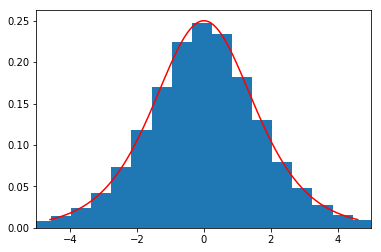

In [27]:
n_samples = 100000
n_bins = 50

# 一様分布から n_samples 個のサンプルを得る
u_rv = scipy.stats.uniform()
u_samples = u_rv.rvs(n_samples)

mu = 0.0
s = 1.0

# 逆変換法により，ロジスティック分布に変換する
# x = \mu + s + log(u / ( 1- u))
x_samples = mu + s * np.log(u_samples / (1 - u_samples))

logistic_rv = scipy.stats.logistic()

fig, ax = plt.subplots(1, 1)

u_true = np.linspace(logistic_rv.ppf(0.01), logistic_rv.ppf(0.99), n_samples)
x_true = logistic_rv.pdf(u_true)
# 逆変換法によって得たサンプルをプロット
ax.hist(x_samples, n_bins, normed=True)
# 真の分布をプロット
ax.plot(u_true, x_true, 'r-', label='logistic pdf')
ax.set_xlim((-5, 5))
plt.show()